This is the initial stage of treeClassifier.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load data from CSV file
file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

In [3]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [4]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [5]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [6]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [7]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [8]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [9]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [10]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [12]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [13]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=30, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [14]:
# Compile the model
custom_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [15]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=30)

Epoch 1/5
3/3 [==============================] - 1s 9ms/step - loss: 12.5837 - accuracy: 0.3611
Epoch 2/5
3/3 [==============================] - 0s 5ms/step - loss: 9.4147 - accuracy: 0.3611
Epoch 3/5
3/3 [==============================] - 0s 5ms/step - loss: 6.4060 - accuracy: 0.3611
Epoch 4/5
3/3 [==============================] - 0s 4ms/step - loss: 4.6897 - accuracy: 0.3333
Epoch 5/5
3/3 [==============================] - 0s 4ms/step - loss: 4.0990 - accuracy: 0.3333


In [16]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 114ms/step


In [17]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 307ms/step - loss: 4.6506 - accuracy: 0.3333
Test accuracy: 0.3333333432674408



Now we get "0.3" as accuracy, so we change the optimizer as "rmsprop" and observe the change.

we start the procedure from beginning.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [19]:
# Load data from CSV file
file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

In [20]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [21]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [22]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [23]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [24]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [25]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [26]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [27]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [29]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [30]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=30, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [31]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [32]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=30)

Epoch 1/5
3/3 [==============================] - 1s 1ms/step - loss: 2.2666 - accuracy: 0.3333
Epoch 2/5
3/3 [==============================] - 0s 5ms/step - loss: 1.1795 - accuracy: 0.5000
Epoch 3/5
3/3 [==============================] - 0s 3ms/step - loss: 0.8988 - accuracy: 0.6389
Epoch 4/5
3/3 [==============================] - 0s 2ms/step - loss: 1.3032 - accuracy: 0.5278
Epoch 5/5
3/3 [==============================] - 0s 4ms/step - loss: 1.0725 - accuracy: 0.5000


In [33]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 221ms/step


In [34]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 266ms/step - loss: 0.7714 - accuracy: 0.6667
Test accuracy: 0.6666666865348816



We get the positive result model accuracy Now it was increased as "0.6".

So we keep the optimizer as "rmsprop".

Now we change the "activation='softmax'" as "activation='sigmoid'" and observe the change.

we start the procedure from beginning.

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [36]:
# Load data from CSV file
file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

In [37]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [38]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [39]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [40]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [41]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [42]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [43]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [44]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [46]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [47]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=30, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='sigmoid')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [48]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [49]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=30)

Epoch 1/5
3/3 [==============================] - 1s 5ms/step - loss: 7.3796 - accuracy: 0.3333
Epoch 2/5
3/3 [==============================] - 0s 5ms/step - loss: 5.9901 - accuracy: 0.2778
Epoch 3/5
3/3 [==============================] - 0s 5ms/step - loss: 5.4281 - accuracy: 0.2500
Epoch 4/5
3/3 [==============================] - 0s 6ms/step - loss: 4.7977 - accuracy: 0.2917
Epoch 5/5
3/3 [==============================] - 0s 1ms/step - loss: 4.2366 - accuracy: 0.3056


In [50]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 113ms/step


In [51]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 222ms/step - loss: 3.3759 - accuracy: 0.3333
Test accuracy: 0.3333333432674408



Now we get the Negative result, the model accuracy was decreased as "0.3"

So we keep the "activation='softmax'"

we change the "hidden_layer1 = Dense(units=30" as "hidden_layer1 = Dense(units=60," and observe the changes.

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [53]:
# Load data from CSV file
file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

In [54]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [55]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [56]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [57]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [58]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [59]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [60]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [61]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [62]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [63]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [64]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=60, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [65]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [66]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=30)

Epoch 1/5
3/3 [==============================] - 1s 3ms/step - loss: 2.4155 - accuracy: 0.3194
Epoch 2/5
3/3 [==============================] - 0s 173us/step - loss: 1.1970 - accuracy: 0.2917
Epoch 3/5
3/3 [==============================] - 0s 3ms/step - loss: 1.2216 - accuracy: 0.3472
Epoch 4/5
3/3 [==============================] - 0s 2ms/step - loss: 0.9477 - accuracy: 0.3889
Epoch 5/5
3/3 [==============================] - 0s 5ms/step - loss: 0.9301 - accuracy: 0.4861


In [67]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 60ms/step


In [68]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 130ms/step - loss: 0.9512 - accuracy: 0.3889
Test accuracy: 0.3888888955116272



Now we get the positive result but not as same because in the previous procedure accuracy was"0.66". 

Now the accuracy was "0.38".

we change the "hidden_layer1 = Dense(units=60" as "hidden_layer1 = Dense(units=90," and observe the changes.

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [70]:
# Load data from CSV file
file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

In [71]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [72]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [73]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [74]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [75]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [76]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [77]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [78]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [79]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [80]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [81]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [82]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [83]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=30)

Epoch 1/5
3/3 [==============================] - 0s 8ms/step - loss: 3.0841 - accuracy: 0.4028
Epoch 2/5
3/3 [==============================] - 0s 0s/step - loss: 0.9814 - accuracy: 0.3333
Epoch 3/5
3/3 [==============================] - 0s 2ms/step - loss: 0.7340 - accuracy: 0.7639
Epoch 4/5
3/3 [==============================] - 0s 5ms/step - loss: 0.9909 - accuracy: 0.6528
Epoch 5/5
3/3 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.7222


In [84]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 62ms/step


In [85]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 135ms/step - loss: 1.0926 - accuracy: 0.4444
Test accuracy: 0.4444444477558136



Now we get the positive result, the model accuracy was slightly increased as "0.44" so we keep the change.

Now we change the "hidden_layer2 = Dense(units=30," as "hidden_layer2 = Dense(units=15," and observe the changes.

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [87]:
# Load data from CSV file
file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

In [88]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [89]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [90]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [91]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [92]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [93]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [94]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [95]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [96]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [97]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [98]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=15, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [99]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [100]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=30)

Epoch 1/5
3/3 [==============================] - 2s 13ms/step - loss: 3.8161 - accuracy: 0.2778
Epoch 2/5
3/3 [==============================] - 0s 4ms/step - loss: 1.5410 - accuracy: 0.2778
Epoch 3/5
3/3 [==============================] - 0s 6ms/step - loss: 1.1037 - accuracy: 0.3194
Epoch 4/5
3/3 [==============================] - 0s 4ms/step - loss: 1.0881 - accuracy: 0.3194
Epoch 5/5
3/3 [==============================] - 0s 2ms/step - loss: 1.1755 - accuracy: 0.3194


In [101]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 103ms/step


In [102]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 162ms/step - loss: 1.1895 - accuracy: 0.3333
Test accuracy: 0.3333333432674408



Now we get negative result, model accuracy is reduced so we keep this "hidden_layer2 = Dense(units=30," as same.

Now we change the batch size as "15" and observe the changes


In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [104]:
# Load data from CSV file
file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

In [105]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [106]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [107]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [108]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [109]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [110]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [111]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [112]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [113]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [114]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [115]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [116]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [117]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=15)

Epoch 1/5
5/5 [==============================] - 1s 6ms/step - loss: 2.9931 - accuracy: 0.2917
Epoch 2/5
5/5 [==============================] - 0s 3ms/step - loss: 0.9704 - accuracy: 0.5833
Epoch 3/5
5/5 [==============================] - 0s 3ms/step - loss: 0.8642 - accuracy: 0.6944
Epoch 4/5
5/5 [==============================] - 0s 1ms/step - loss: 0.9421 - accuracy: 0.5278
Epoch 5/5
5/5 [==============================] - 0s 4ms/step - loss: 0.8098 - accuracy: 0.6389


In [118]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 78ms/step


In [119]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 137ms/step - loss: 2.3288 - accuracy: 0.3889
Test accuracy: 0.3888888955116272



Now we get the positive result model accuracy was increased but not look like same.

Now we increase the batch size as "60" and observe the changes


In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [121]:
# Load data from CSV file
file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

In [122]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [123]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [124]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [125]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [126]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [127]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [128]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [129]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [130]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [131]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [132]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [133]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [134]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=60)

Epoch 1/5
2/2 [==============================] - 0s 0s/step - loss: 5.2189 - accuracy: 0.3194
Epoch 2/5
2/2 [==============================] - 0s 0s/step - loss: 3.4518 - accuracy: 0.3194
Epoch 3/5
2/2 [==============================] - 0s 5ms/step - loss: 2.7618 - accuracy: 0.2917
Epoch 4/5
2/2 [==============================] - 0s 5ms/step - loss: 2.4129 - accuracy: 0.2778
Epoch 5/5
2/2 [==============================] - 0s 3ms/step - loss: 1.9693 - accuracy: 0.3750


In [135]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 70ms/step


In [136]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 162ms/step - loss: 1.4561 - accuracy: 0.2222
Test accuracy: 0.2222222238779068



Now we get Negative result and we get very low accuracy so I keep the batch size as 15.

Now I change the epochs as 3 and observe the changes.


In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [138]:
# Load data from CSV file
file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

In [139]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [140]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [141]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [142]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [143]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [144]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [145]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [146]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [147]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [148]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [149]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [150]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [151]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=3, batch_size=15)

Epoch 1/3
5/5 [==============================] - 0s 5ms/step - loss: 3.0535 - accuracy: 0.2917
Epoch 2/3
5/5 [==============================] - 0s 3ms/step - loss: 0.9234 - accuracy: 0.5694
Epoch 3/3
5/5 [==============================] - 0s 3ms/step - loss: 1.0450 - accuracy: 0.6389


In [152]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 69ms/step


In [153]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 164ms/step - loss: 1.1663 - accuracy: 0.5000
Test accuracy: 0.5



Now I get the Positive result. the model accuracy was increased.

Now I change the epochs as 10 and observe the changes.


In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [155]:
# Load data from CSV file
file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

In [156]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [157]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [158]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [159]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [160]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [161]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [162]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [163]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [164]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [165]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [166]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [167]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [169]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=10, batch_size=15)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 1.0193 - accuracy: 0.3472
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 1.3673 - accuracy: 0.3889
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 1.0366 - accuracy: 0.6250
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 1.2657 - accuracy: 0.4028
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 1.0097 - accuracy: 0.4861
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 1.0122 - accuracy: 0.4861
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.9698 - accuracy: 0.6944
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.8477 - accuracy: 0.6944
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 1.0494 - accuracy: 0.5556
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.8711 - accuracy: 0.6528


In [170]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 87ms/step


In [171]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 144ms/step - loss: 0.9992 - accuracy: 0.6667
Test accuracy: 0.6666666865348816



Now I get the Positive result and the model accuracy was "0.66".

From the above testings I get the Maximum test accuracy as "0.66" and Minimum test accuracy as "0.22"

Now we choose the final testing as Our model and continue our process

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [27]:
# Load data from CSV file
file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

In [28]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [29]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [30]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [31]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [32]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [33]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [34]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [35]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [36]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [37]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [38]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [39]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [40]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=10, batch_size=15)

Epoch 1/10
5/5 [==============================] - 1s 4ms/step - loss: 6.9301 - accuracy: 0.3056
Epoch 2/10
5/5 [==============================] - 0s 349us/step - loss: 1.7324 - accuracy: 0.3889
Epoch 3/10
5/5 [==============================] - 0s 284us/step - loss: 1.3736 - accuracy: 0.2639
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 1.0980 - accuracy: 0.3194
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 1.2150 - accuracy: 0.3194
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 1.1447 - accuracy: 0.3333
Epoch 7/10
5/5 [==============================] - 0s 0s/step - loss: 1.5199 - accuracy: 0.2361
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.9592 - accuracy: 0.4583
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 1.0438 - accuracy: 0.3333
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 1.0598 - accuracy: 0.5278


In [41]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 64ms/step


In [42]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 1s 1s/step - loss: 1.1650 - accuracy: 0.5556
Test accuracy: 0.5555555820465088


In [43]:
#try with early stopping 

from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers


#vectorize the train data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#one-hot-encode the labels
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


#model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


# # Define the early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
#                                patience=3,          # Number of epochs with no improvement after which training will be stopped
#                                verbose=1,           # Output progress messages
#                                restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity


# Define the early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint(filepath='best_model.h5',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   verbose=1)

#validation dataset preparation 
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model with the early stopping callback
# history = model.fit(partial_x_train,
#                     partial_y_train,
#                     epochs=20,
#                     batch_size=60,
#                     validation_data=(x_val, y_val),
#                     callbacks=[early_stopping])  # Include the callback here

# Fit the model with the callbacks
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=60,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/20
130/134 [============================>.] - ETA: 0s - loss: 1.6296 - accuracy: 0.6540
Epoch 1: val_loss improved from inf to 1.13964, saving model to best_model.h5
134/134 [==============================] - 2s 8ms/step - loss: 1.6139 - accuracy: 0.6570 - val_loss: 1.1396 - val_accuracy: 0.7330
Epoch 2/20
124/134 [==========================>...] - ETA: 0s - loss: 0.8420 - accuracy: 0.8172
Epoch 2: val_loss improved from 1.13964 to 0.96668, saving model to best_model.h5
134/134 [==============================] - 1s 6ms/step - loss: 0.8382 - accuracy: 0.8177 - val_loss: 0.9667 - val_accuracy: 0.7890
Epoch 3/20
133/134 [============================>.] - ETA: 0s - loss: 0.5245 - accuracy: 0.8872
Epoch 3: val_loss improved from 0.96668 to 0.86482, saving model to best_model.h5
134/134 [==============================] - 1s 6ms/step - loss: 0.5244 - accuracy: 0.8872 - val_loss: 0.8648 - val_accuracy: 0.8090
Epoch 4/20
133/134 [============================>.] - ETA: 0s - loss: 0.3570 

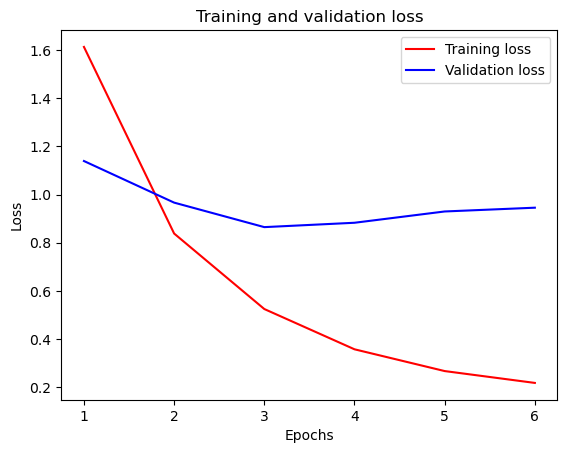

In [44]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

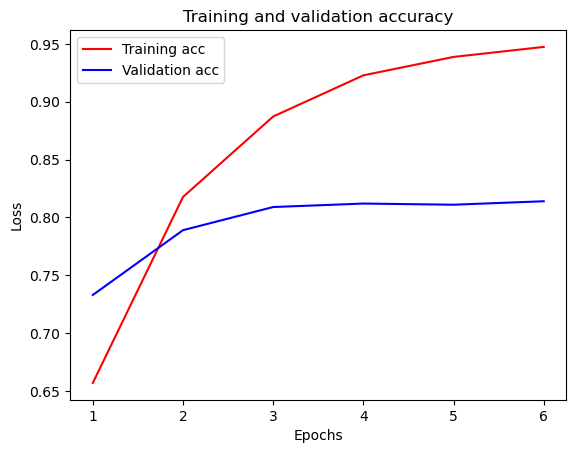

In [45]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 0.9430 - accuracy: 0.7867


In [47]:
results 

[0.9430083632469177, 0.7867319583892822]

In [48]:
predictions = model.predict(x_test)
predictions.shape

71/71 [==============================] - 0s 2ms/step


(2246, 46)

In [49]:
np.sum(predictions[0])

1.0000002

In [50]:
np.argmax(predictions[0])

3